In [9]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [2]:
np.set_printoptions(suppress=True)

NameError: name 'np' is not defined

In [4]:
df=pd.read_csv('Data-Classification.txt')
X=df.iloc[:,1:]
scaler=MinMaxScaler()
X_norm=scaler.fit_transform(X)

# Exploratory

## Class imbalance

In [68]:
#df[['col1', 'col2', 'col3', 'col4']].groupby(['col1', 'col2']).agg(['mean', 'count'])
df.columns

Index(['grp', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20',
       'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30'],
      dtype='object')

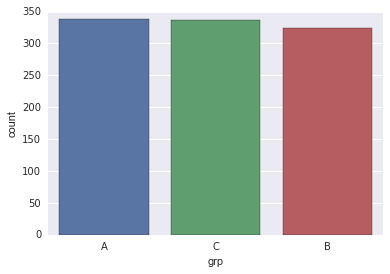

In [125]:
sns.set(style="darkgrid")
ax = sns.countplot(x='grp',data=df)
plt.savefig('Class_balance')

## Correlation

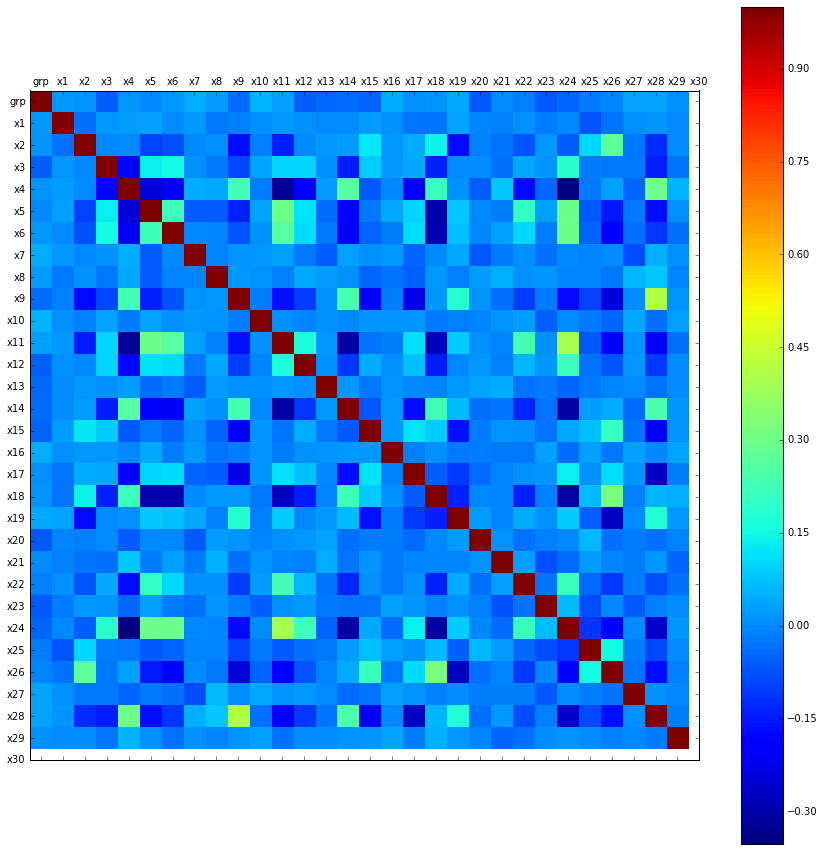

In [7]:
# Correlation
plt.figure(1, figsize=(15,15))
#plt.matshow(d.corr(), fignum=1)
plt.matshow(df.corr(), fignum=1)
plt.xticks(range(len(df.columns)), df.columns)
plt.yticks(range(len(df.columns)), df.columns)
plt.colorbar()
plt.savefig('Correlation')
plt.show()

# PCA, t-SNE

In [13]:
#http://setosa.io/ev/principal-component-analysis/
#https://medium.com/@luckylwk/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b
from sklearn.decomposition import PCA
pca = PCA(n_components=30)
pca.fit(X)
components = pca.transform(X_norm)

In [15]:
import numpy as np
explained_var=pca.explained_variance_ratio_
cum_var=np.cumsum(explained_var)

TypeError: slice indices must be integers or None or have an __index__ method

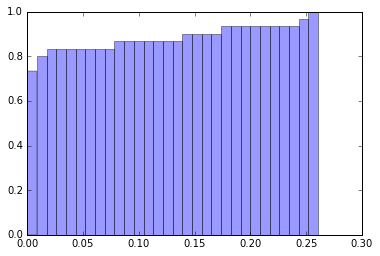

In [16]:
sns.distplot(explained_var,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))

In [18]:
rows=list(range(1,31))

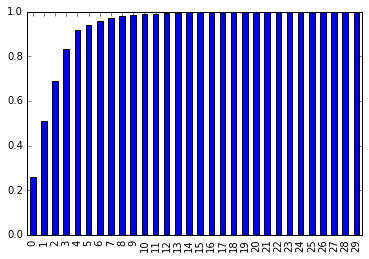

In [19]:
df_plot=pd.DataFrame({'cumulative_variance':cum_var, 'number': rows})
df_plot['cumulative_variance'].plot.bar()

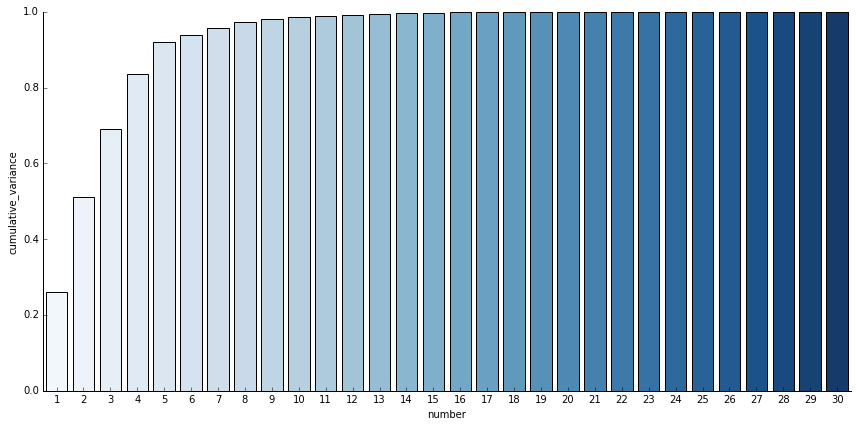

In [27]:
#sns.factorplot("x","y", data=df,hue="cat",kind="bar",palette="Blues",size=6,aspect=2,legend_out=False);
sns.factorplot( x= 'number', y='cumulative_variance', data = df_plot, kind="bar",palette="Blues",size=6,aspect=2,legend_out=True)
plt.savefig('Variance_Explained')

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


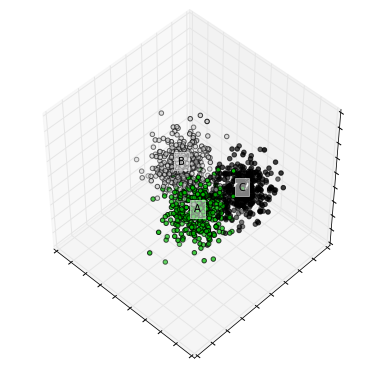

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]

z = {'A':0,'B':1,'C':2}

X = X_norm
y = np.array(df['grp'].map(z))

print(type(X_norm))
print(type(y))


fig = plt.figure(1, figsize=(5, 5))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)


for name, label in [('A', 0), ('B', 1), ('C', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() ,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
plt.savefig('PCA_3d')
plt.show()

# PCA 

In [106]:
components=pd.DataFrame(X)
components['class']=y
map_1={0:'A',1:'B',2:'C'}
components['class']=components['class'].map(map_1)

In [104]:
import seaborn as sns

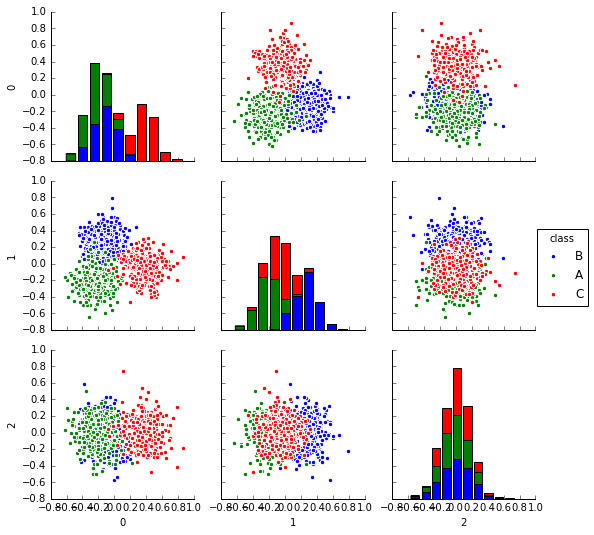

In [107]:
sns_plot = sns.pairplot(components, hue='class', size=2.5)

# Plotting PCA and explained Variance

http://scikit-learn.org/stable/tutorial/statistical_inference/putting_together.html

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

logistic = linear_model.LogisticRegression()

pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

# Plot the PCA spectrum
pca.fit(X_digits)

plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

# Prediction
n_components = [20, 40, 64]
Cs = np.logspace(-4, 4, 3)

# Parameters of pipelines can be set using ‘__’ separated parameter names:
estimator = GridSearchCV(pipe,
                         dict(pca__n_components=n_components,
                              logistic__C=Cs))
estimator.fit(X_digits, y_digits)

plt.axvline(estimator.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
plt.legend(prop=dict(size=12))
plt.show()

# Decision Trees

Decision Trees may be used for clustering but in supervised manner. Samples are splitted on each branch